# Hand-on Project

- Lấy dữ liệu tỷ giá từ website của Vietcombank trong tháng 1 năm 2024


In [1]:
import json
from datetime import date, timedelta
import pandas as pd
import requests

## 1. Lấy dữ liệu tỷ giá của ngày hôm nay

source: https://www.vietcombank.com.vn/vi-VN/KHCN/Cong-cu-Tien-ich/Ty-gia

url: https://www.vietcombank.com.vn/api/exchangerates?date=2023-10-15

In [77]:
url = 'https://www.vietcombank.com.vn/api/exchangerates?date=2018-10-15'

In [79]:
# Get dữ liệu từ url chứa dữ liệu tỷ giá
raw = requests.get(url)

In [80]:
# Lấy dữ liệu được trả về và lưu vào raw_string
raw_string = raw.text

In [81]:
# Dữ liệu là dạng string, transform dữ liệu sang dạng dict để tạo DataFrame
raw_dict = json.loads(raw_string)

In [82]:
raw_dict

{'Count': 0,
 'Date': '0001-01-01T00:00:00',
 'UpdatedDate': '0001-01-01T00:00:00',
 'Data': []}

In [14]:
# Extract dữ liệu tỷ giá từ raw_dict
raw_exchange_data = raw_dict['Data']

In [ ]:
# list của dict trong đó mỗi dict gồm currencyName, currencyCode, cash, transfer, sell
raw_exchange_data

In [21]:
# Tạo list từ currencyName, currencyCode, cash, transfer, sell từ raw_exchange_data
currency_name_lst = []
currency_code_lst = []
cash_lst = []
transfer_lst = []
sell_lst = []

In [22]:
for each_exchange_data in raw_exchange_data:
    currency_name = each_exchange_data['currencyName']
    currency_code = each_exchange_data['currencyCode']
    cash = each_exchange_data['cash']
    transfer = each_exchange_data['transfer']
    sell = each_exchange_data['sell']
    
    currency_name_lst.append(currency_name)
    currency_code_lst.append(currency_code)
    cash_lst.append(cash)
    transfer_lst.append(transfer)
    sell_lst.append(sell)

In [28]:
# Tạo df từ các list ở bước trước
r = {
    'Currency Name': currency_name_lst,
    'Currentcy Code': currency_code_lst,
    'Cash': cash_lst,
    'Transfer': transfer_lst,
    'Sell': sell_lst
}
pd.DataFrame(r)

,Currency Name,Currentcy Code,Cash,Transfer,Sell
0,US DOLLAR,USD,24245.00,24275.00,24615.00
1,EURO,EUR,25106.59,25360.20,26484.85
2,POUND STERLING,GBP,29038.95,29332.28,30275.14
3,YEN,JPY,158.67,160.27,167.96
4,AUSTRALIAN DOLLAR,AUD,15045.86,15197.83,15686.36
5,SINGAPORE DOLLAR,SGD,17404.59,17580.39,18145.50
6,THAILAND BAHT,THB,592.91,658.79,684.06
7,CANADIAN DOLLAR,CAD,17412.22,17588.10,18153.46
8,SWISS FRANC,CHF,26263.26,26528.54,27381.28
9,HONGKONG DOLLAR,HKD,3045.96,3076.73,3175.63


In [54]:
# Tạo DataFrame từ dữ liệu thô
raw_df = pd.DataFrame(raw_exchange_data)

In [55]:
raw_df.head()

,currencyName,currencyCode,cash,transfer,sell,icon
0,US DOLLAR,USD,24245.00,24275.00,24615.00,/-/media/Default-Website/Default-Images/Icons/...
1,EURO,EUR,25106.59,25360.20,26484.85,/-/media/Default-Website/Default-Images/Icons/...
2,POUND STERLING,GBP,29038.95,29332.28,30275.14,/-/media/Default-Website/Default-Images/Icons/...
3,YEN,JPY,158.67,160.27,167.96,/-/media/Default-Website/Default-Images/Icons/...
4,AUSTRALIAN DOLLAR,AUD,15045.86,15197.83,15686.36,/-/media/Default-Website/Default-Images/Icons/...


- drop cột icon
- rename toàn bộ các cột
- format lại kiểu dữ liệu của 3 cột cash, transfer, sell

In [56]:
df = raw_df.copy()
df.drop(columns=['icon'], inplace=True)

In [57]:
df.head()

,currencyName,currencyCode,cash,transfer,sell
0,US DOLLAR,USD,24245.00,24275.00,24615.00
1,EURO,EUR,25106.59,25360.20,26484.85
2,POUND STERLING,GBP,29038.95,29332.28,30275.14
3,YEN,JPY,158.67,160.27,167.96
4,AUSTRALIAN DOLLAR,AUD,15045.86,15197.83,15686.36


In [58]:
df.columns = ['Currency Name', 'Currency Code', 'Cash', 'Transfer', 'Sell']

In [60]:
df['Cash'] = df['Cash'].astype(float)
df['Transfer'] = df['Transfer'].astype(float)
df['Sell'] = df['Sell'].astype(float)

In [61]:
df.insert(2, "Date", raw_dict['Date'])

In [62]:
df

,Currency Name,Currency Code,Date,Cash,Transfer,Sell
0,US DOLLAR,USD,2023-10-15T00:00:00,24245.00,24275.00,24615.00
1,EURO,EUR,2023-10-15T00:00:00,25106.59,25360.20,26484.85
2,POUND STERLING,GBP,2023-10-15T00:00:00,29038.95,29332.28,30275.14
3,YEN,JPY,2023-10-15T00:00:00,158.67,160.27,167.96
4,AUSTRALIAN DOLLAR,AUD,2023-10-15T00:00:00,15045.86,15197.83,15686.36
5,SINGAPORE DOLLAR,SGD,2023-10-15T00:00:00,17404.59,17580.39,18145.50
6,THAILAND BAHT,THB,2023-10-15T00:00:00,592.91,658.79,684.06
7,CANADIAN DOLLAR,CAD,2023-10-15T00:00:00,17412.22,17588.10,18153.46
8,SWISS FRANC,CHF,2023-10-15T00:00:00,26263.26,26528.54,27381.28
9,HONGKONG DOLLAR,HKD,2023-10-15T00:00:00,3045.96,3076.73,3175.63


## 2. Hàm lấy tỷ giá

In [95]:
def get_exchange_data(ngaycanlay):
    """Hàm lấy tỷ giá từ Vietcombank.
    
    Args:
    ----
        ngaycanlay (str): ngày cần lấy dữ liệu tỷ giá, format: YYYY-MM-DD.
    
    Returns:
    ----
        pd.DataFrame chứa dữ liệu tỷ giá của ngày cần lấy.
    """
    url = f'https://www.vietcombank.com.vn/api/exchangerates?date={ngaycanlay}'
    raw = requests.get(url)
    raw_string = raw.text
    raw_dict = json.loads(raw_string)
    raw_exchange_data = raw_dict['Data']
    raw_df = pd.DataFrame(raw_exchange_data)

    df = raw_df.copy()
    df.drop(columns=['icon'], inplace=True)
    df.columns = ['Currency Name', 'Currency Code', 'Cash', 'Transfer', 'Sell']
    df['Cash'] = df['Cash'].astype(float)
    df['Transfer'] = df['Transfer'].astype(float)
    df['Sell'] = df['Sell'].astype(float)
    df.insert(2, "Date", raw_dict['Date'])
    
    return df

In [97]:
current_date = date.today()
start_date = date(2023, 10, 9)
delta = (current_date - start_date).days

In [98]:
result = pd.DataFrame()
for i in range(0, delta+1):
    next_date = start_date + timedelta(days=i)
    str_next_date = next_date.strftime('%Y-%m-%d')
    exchange_df = get_exchange_data(str_next_date)
    result = pd.concat([result, exchange_df], ignore_index=True)

In [101]:
usd_exchange_df = result.loc[result['Currency Code'] == 'USD']

In [102]:
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AxesSubplot: xlabel='Date', ylabel='Transfer'>

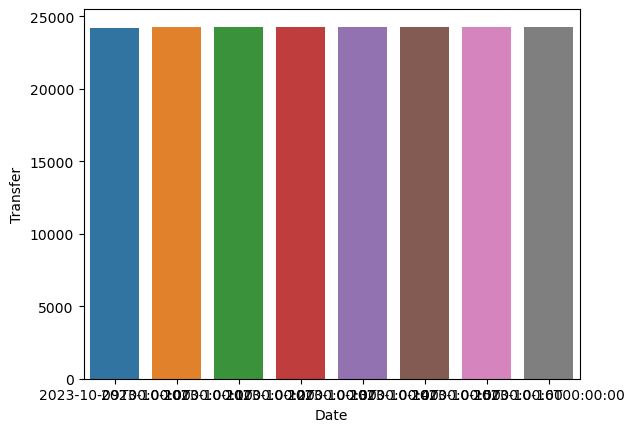

In [103]:
sns.barplot(data=usd_exchange_df, x='Date', y='Transfer')

#### Tổng hợp
- data types
    + int/float:
    + string:
    + boolean: True/False
    + None
    + datetime
- if/else
- loop:
    + for
    + while
    + break / continue statement
- data structures:
    + list
    + tuple
    + set
    + dictionary
- list/set/dict comprehensions
- function, lambda function

- pandas
    + Series
    + DataFrame
        * select, indexing, filter
        * I/O: đọc file và ghi file với DataFrame

- data visualize
    + matplotlib.pyplot
    + seaborn
    + plotly (thêm)